# Data Visualization & Splitting Verification

This notebook verifies the output of `split_data.py`. We check:
1. **Test Set Distribution**: Ensuring the 15% hold-out set is stratified.
2. **Cross-Validation Folds**: Ensuring the 5 folds are balanced and representative.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Config
DATA_LOADERS = Path("../data/loaders")
TEST_CSV = DATA_LOADERS / "test.csv"
FOLDS_CSV = DATA_LOADERS / "train_folds.csv"

# Set Style
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

## 1. Load Data Splits

In [7]:
test_df = pd.read_csv(TEST_CSV)
folds_df = pd.read_csv(FOLDS_CSV)

print(f"Test Set: {len(test_df)} images")
print(f"Training/CV Set: {len(folds_df)} images")
print(f"Total: {len(test_df) + len(folds_df)} images")

Test Set: 3736 images
Training/CV Set: 21169 images
Total: 24905 images


## 2. Test Set Distribution

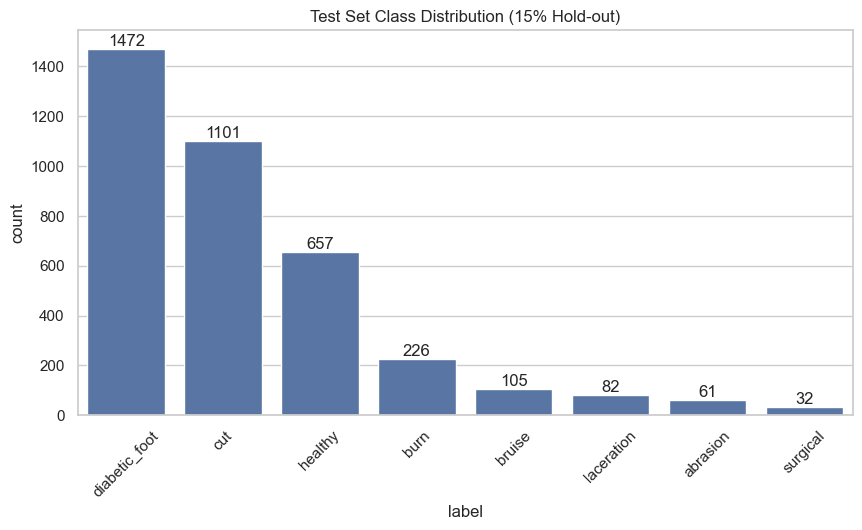

In [8]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=test_df, x='label', order=test_df['label'].value_counts().index)
ax.set_title("Test Set Class Distribution (15% Hold-out)")
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45)
plt.show()

## 3. Cross-Validation Folds Distribution
We expect the class distribution to be consistent across all 5 folds.

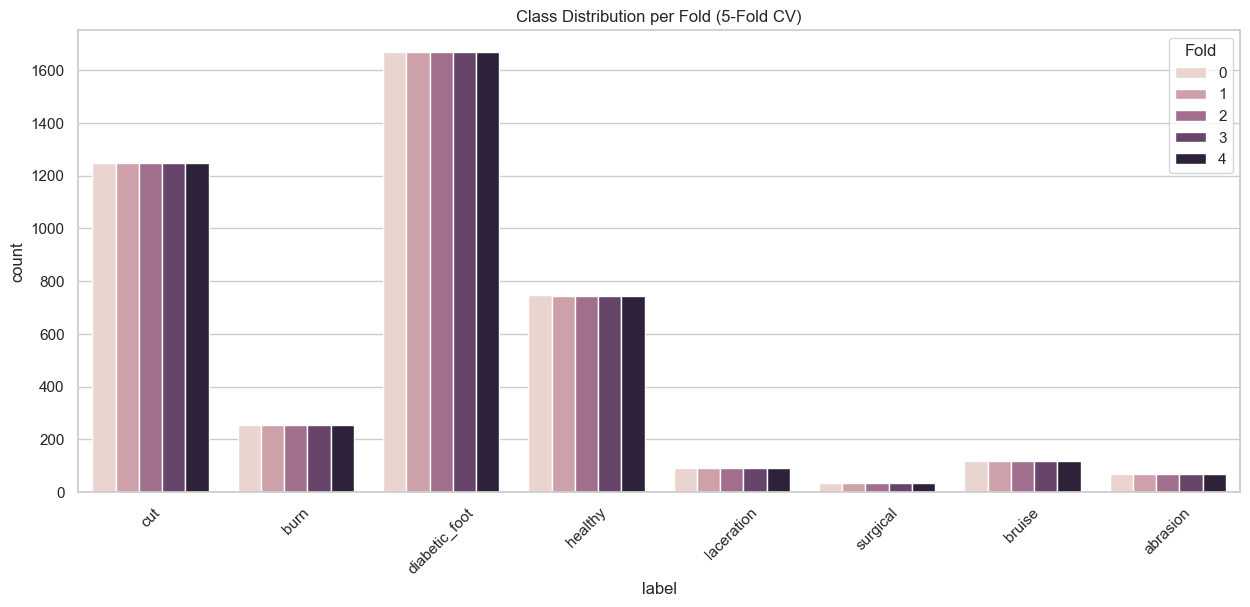

In [9]:
plt.figure(figsize=(15, 6))
ax = sns.countplot(data=folds_df, x='label', hue='fold')
ax.set_title("Class Distribution per Fold (5-Fold CV)")
plt.xticks(rotation=45)
plt.legend(title='Fold')
plt.show()

In [10]:
# Detailed metrics per fold
fold_stats = folds_df.groupby(['fold', 'label']).size().unstack(fill_value=0)
print("Class Counts per Fold:")
display(fold_stats)

Class Counts per Fold:


label,abrasion,bruise,burn,cut,diabetic_foot,healthy,laceration,surgical
fold,,,,,,,,
0,68,120,255,1249,1668,746,92,36
1,69,119,255,1249,1668,745,93,36
2,69,119,256,1248,1668,745,93,36
3,69,120,256,1248,1668,745,92,36
4,68,120,256,1248,1668,745,92,36


## 4. Verification Conclusion

We calculate the coefficient of variation (CV) for each class across folds to quantify consistency.
A low CV indicates successful stratification.

In [12]:
# Calculate consistency metrics across the 5 folds (columns are labels, rows are folds)
# Calculate stats across folds (axis=0)
std_dev = fold_stats.std(axis=0) 
mean_counts = fold_stats.mean(axis=0)
cv = (std_dev / mean_counts) * 100 # Coefficient of Variation in %

print("Coefficient of Variation (CV) per Class across 5 Folds:")
print(cv.sort_values(ascending=False))

print("\nVerification Status:")
if cv.max() < 5.0:
    print("✅ SUCCESS: Stratification is excellent (Max CV < 5%)")
else:
    print(f"⚠️ WARNING: Some classes have high variance across folds (Max CV: {cv.max():.2f}%)")

Coefficient of Variation (CV) per Class across 5 Folds:
label
abrasion         0.798429
laceration       0.592773
bruise           0.457962
burn             0.214289
healthy          0.060013
cut              0.043874
diabetic_foot    0.000000
surgical         0.000000
dtype: float64

Verification Status:
✅ SUCCESS: Stratification is excellent (Max CV < 5%)
